# Football Result Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('results.csv')

In [3]:
data.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44557 non-null  object
 1   home_team   44557 non-null  object
 2   away_team   44557 non-null  object
 3   home_score  44557 non-null  int64 
 4   away_score  44557 non-null  int64 
 5   tournament  44557 non-null  object
 6   city        44557 non-null  object
 7   country     44557 non-null  object
 8   neutral     44557 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [5]:
#cheking for null values 
data.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [6]:
#creating a new column to assign the winnnig team 
data['result'] = data.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else (row['away_team'] if row['away_score'] > row['home_score'] else 'Draw'), axis=1)

In [7]:
data.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland


# Analysing the distribution of matches accross different cities and countries 


Top 10 cities with the most matches:
Kuala Lumpur    677
Doha            519
Bangkok         429
London          420
Budapest        411
Montevideo      361
Kuwait City     356
Vienna          351
Glasgow         341
Copenhagen      341
Name: city, dtype: int64
...............................................
Top 10 countries with the most matches:
United States           1272
France                   831
Malaysia                 757
England                  723
Sweden                   662
Qatar                    634
Germany                  610
Spain                    570
Brazil                   569
United Arab Emirates     563
Name: country, dtype: int64


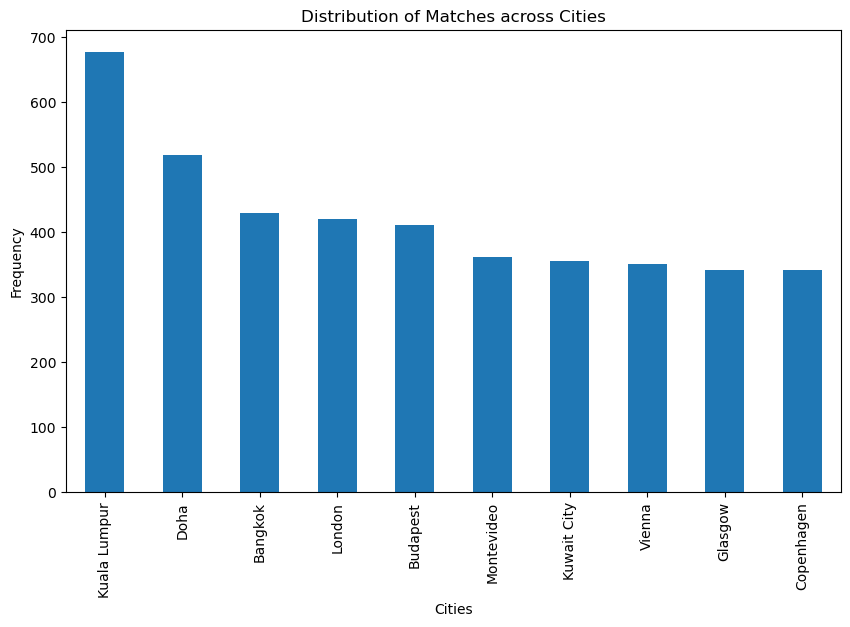

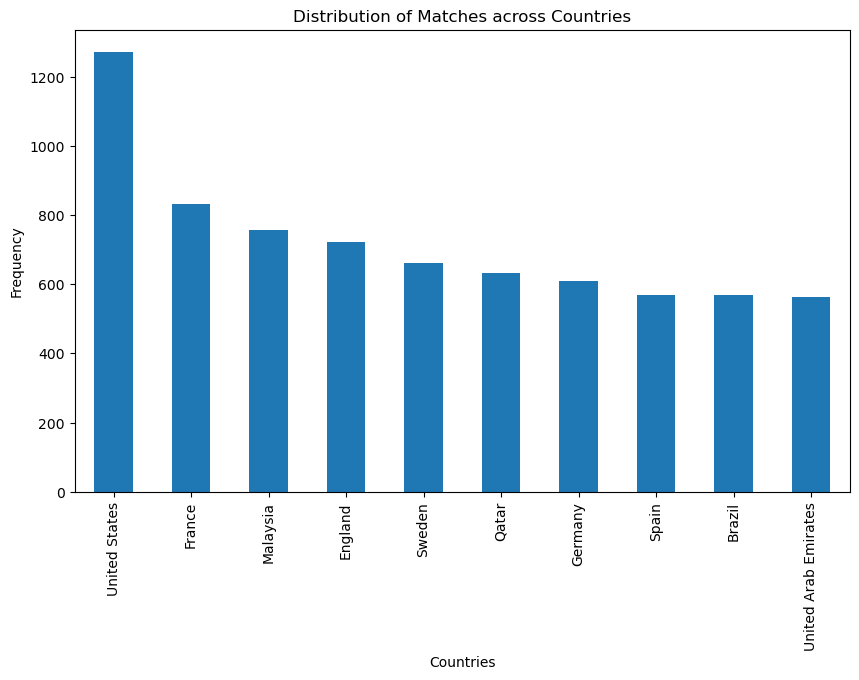

In [8]:
#Analysing the distribution of matches accross different cities and countries 
city_distribution = data['city'].value_counts()
country_distribution = data['country'].value_counts()

# Print the top 10 cities and countries with the most matches

print("Top 10 cities with the most matches:")
print(city_distribution.head(10))
print('...............................................')
print("Top 10 countries with the most matches:")
print(country_distribution.head(10))


# Plotting the city distribution
plt.figure(figsize=(10, 6))
city_distribution.head(10).plot(kind='bar')
plt.title("Distribution of Matches across Cities")
plt.xlabel("Cities")
plt.ylabel("Frequency")
plt.show()

# Plotting the country distribution
plt.figure(figsize=(10, 6))
country_distribution.head(10).plot(kind='bar')
plt.title("Distribution of Matches across Countries")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.show()

# analysing the performance of the teams in home vs away grounds


In [9]:

#calculating the winning percentage for each team in home ground 
home_team_wins=data[data['result']==data['home_team']]['home_team'].value_counts()
home_team_total_matches = data['home_team'].value_counts()
home_team_win_percentage = (home_team_wins / home_team_total_matches) * 100


# Calculating the winning percentage for each team in away ground
away_team_wins = data[data['result'] == data['away_team']]['away_team'].value_counts()
away_team_total_matches = data['away_team'].value_counts()
away_team_win_percentage = (away_team_wins / away_team_total_matches) * 100

# home_team_win_percentage = home_team_win_percentage.sort_values(ascending=False)
# away_team_win_percentage = away_team_win_percentage.sort_values(ascending=False)


print("Winning percentage for each team as the home team:")
print(home_team_win_percentage)
print('..........................................')
print("Winning percentage for each team as the away team:")
print(away_team_win_percentage)




Winning percentage for each team as the home team:
Abkhazia         50.000000
Afghanistan      40.476190
Albania          36.125654
Alderney               NaN
Algeria          56.270096
                   ...    
Yugoslavia       56.842105
Zambia           55.108359
Zanzibar         29.310345
Zimbabwe         51.485149
Åland Islands    51.851852
Name: home_team, Length: 311, dtype: float64
..........................................
Winning percentage for each team as the away team:
Abkhazia         30.000000
Afghanistan      18.987342
Albania          15.116279
Alderney         25.000000
Algeria          27.500000
                   ...    
Yugoslavia       39.518900
Zambia           38.255034
Zanzibar         16.326531
Zimbabwe         32.384342
Åland Islands    36.842105
Name: away_team, Length: 306, dtype: float64


# analysing different Tournements


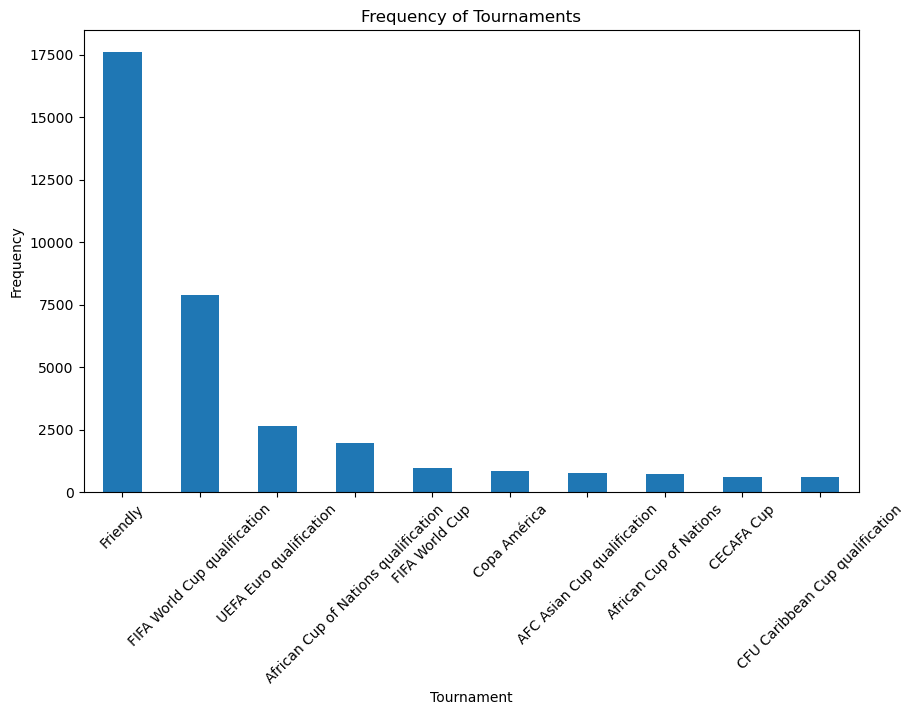

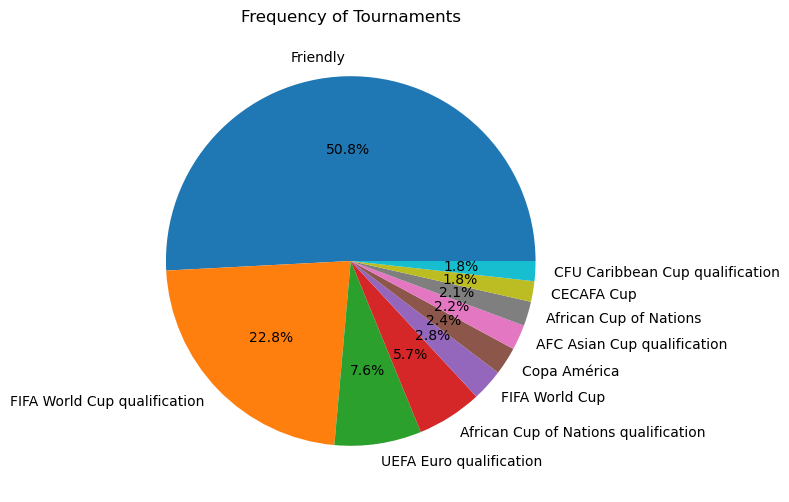

In [10]:


tournament_freq = data['tournament'].value_counts().head(10)
tournament_freq.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tournament')
plt.ylabel('Frequency')
plt.title('Frequency of Tournaments')
plt.xticks(rotation=45)
plt.show()

# Pie chart
tournament_freq.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')
plt.ylabel('')
plt.title('Frequency of Tournaments')
plt.show()

In [11]:
#Finding out the tournemnet with most goals scored

# Calculating the total goals for each tournament
data['total_goals'] = data['home_score'] + data['away_score']

# Grouping the data by tournament and calculate the  goals scored
average_goals = data.groupby('tournament')['total_goals'].sum()

# Finding the tournament with the highest average goals
top_10_tournament = average_goals.sort_values(ascending=False).head(10)

# Printing the tournament with the highest average goals
print("Top 10 Tournament with the highest goals scored:")
print(top_10_tournament)

Top 10 Tournament with the highest goals scored:
tournament
Friendly                                50668
FIFA World Cup qualification            22822
UEFA Euro qualification                  7432
African Cup of Nations qualification     4800
FIFA World Cup                           2720
Copa América                             2671
AFC Asian Cup qualification              2533
CFU Caribbean Cup qualification          2125
Merdeka Tournament                       1955
British Home Championship                1811
Name: total_goals, dtype: int64


# analysing the performance of teams in different tournements 



Top 10 teams with the most wins:
Draw           10249
Brazil           656
England          599
Germany          575
Argentina        557
Sweden           521
Mexico           478
South Korea      478
Hungary          455
Italy            446
Name: result, dtype: int64


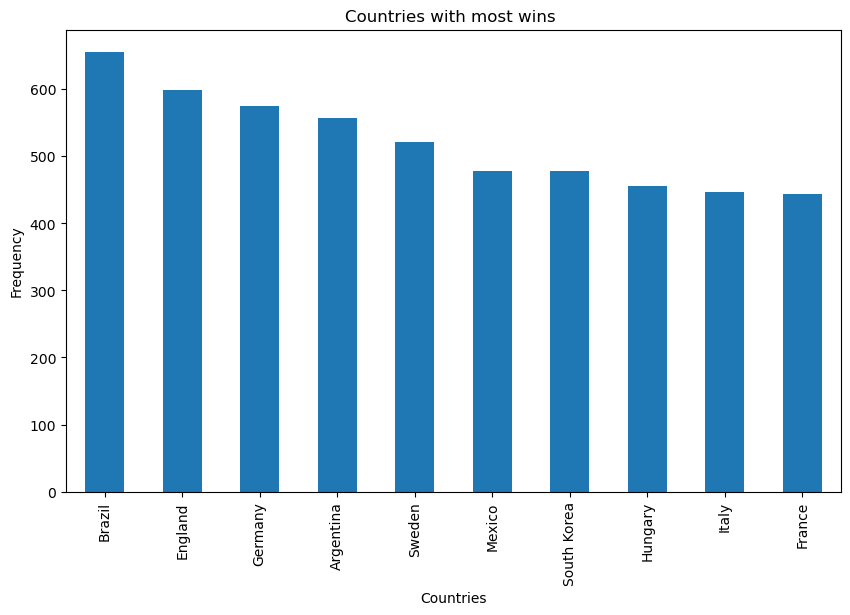

In [12]:
# counting the wins for each country  
team_wins=data['result'].value_counts()

#printing out the top 10 country with most wins 
top_10_teams = team_wins.head(10)
print("Top 10 teams with the most wins:")
print(top_10_teams)

#plotting the top 10 countries with most wins 
top_teams=team_wins[1:].head(10)
plt.figure(figsize=(10, 6))
top_teams.head(10).plot(kind='bar')
plt.title("Countries with most wins ")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.show()


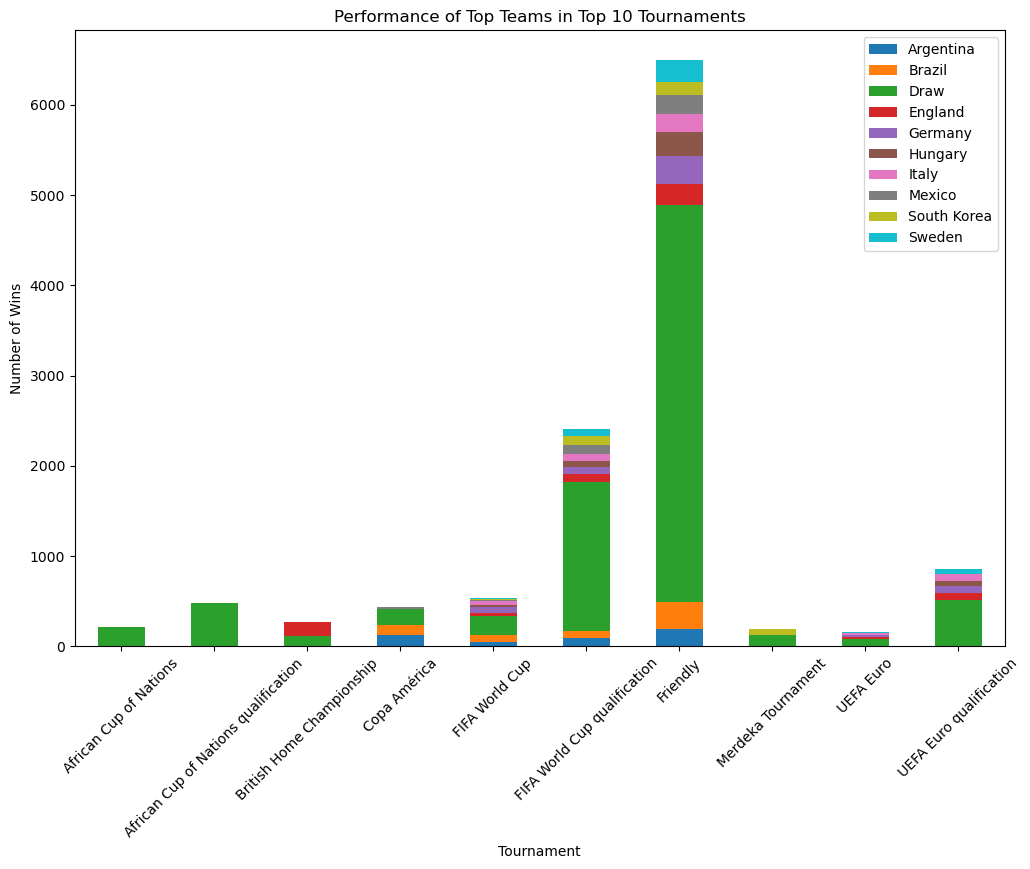

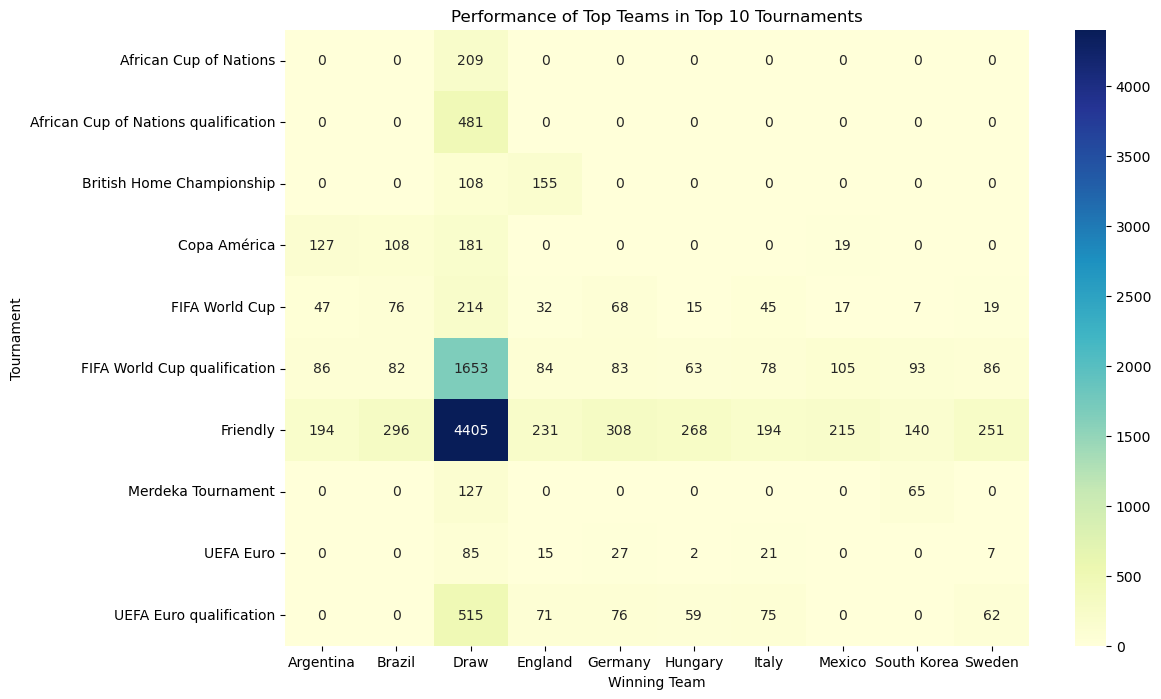

In [13]:


# Determining the top teams based on their overall winning frequency
top_teams = data['result'].value_counts().head(10).index

# Filtering the dataset to include only matches involving the top teams

top_teams_data = data[data['result'].isin(top_teams)]

# Calculating the performance of top teams in the top 10 tournaments
top_tournaments = top_teams_data['tournament'].value_counts().head(10).index

# Filtering the dataset to include only the top 10 tournaments
top_tournaments_data = top_teams_data[top_teams_data['tournament'].isin(top_tournaments)]

# Grouping the filtered data by tournament and winning team and count the occurrences
performance = top_tournaments_data.groupby(['tournament', 'result']).size().unstack().fillna(0)

# Plotting the performance of top teams in the top 10 tournaments
performance.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Performance of Top Teams in Top 10 Tournaments')
plt.xlabel('Tournament')
plt.ylabel('Number of Wins')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Creating a heatmap to visualize the performance of top teams in the top 10 tournaments
plt.figure(figsize=(12, 8))
sns.heatmap(performance, cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Performance of Top Teams in Top 10 Tournaments')
plt.xlabel('Winning Team')
plt.ylabel('Tournament')
plt.show()

# Analayzing the trends in matches overtime

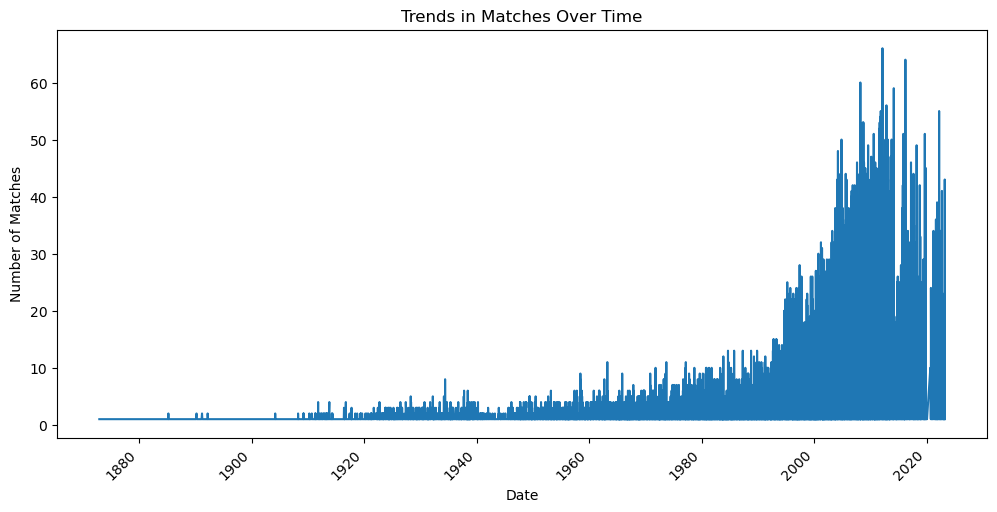

In [14]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort the data by date in ascending order
data = data.sort_values('date')

# Grouping the data by date and counting the number of matches
matches_over_time = data.groupby('date').size()

# Plotting the number of matches over time
plt.figure(figsize=(12, 6))
matches_over_time.plot()
plt.title('Trends in Matches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

# Geographical Analysis

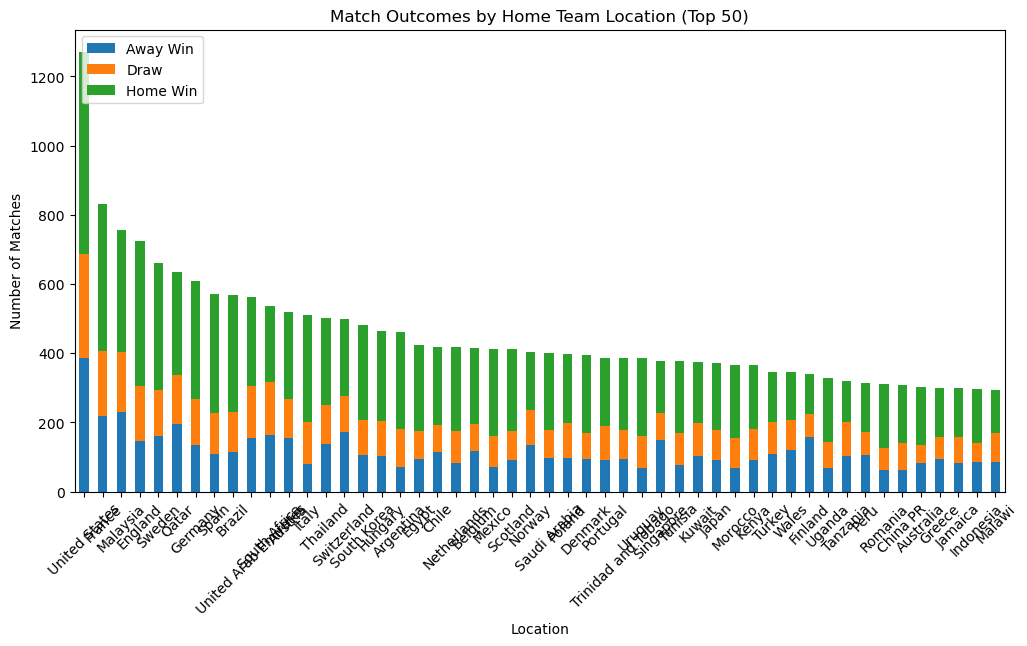

In [16]:
# Creating a new column to represent match outcome
data['match_outcome'] = 'Draw'  # Initialize all matches as draws
data.loc[data['home_score'] > data['away_score'], 'match_outcome'] = 'Home Win'
data.loc[data['home_score'] < data['away_score'], 'match_outcome'] = 'Away Win'

# Grouping the data by home team location and match outcome, counting the occurrences
outcome_by_location = data.groupby(['country', 'match_outcome']).size().unstack()

# Calculating the top 50 locations by number of matches
top_50_locations = outcome_by_location.sum(axis=1).nlargest(50).index

# Subset the outcome_by_location DataFrame with the top 50 locations
top_50_outcome_by_location = outcome_by_location.loc[top_50_locations]

# Ploting the distribution of match outcomes for the top 50 locations
top_50_outcome_by_location.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Match Outcomes by Home Team Location (Top 50)')
plt.xlabel('Location')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

Finding out the loactions where home team adavantage was irrelevent 

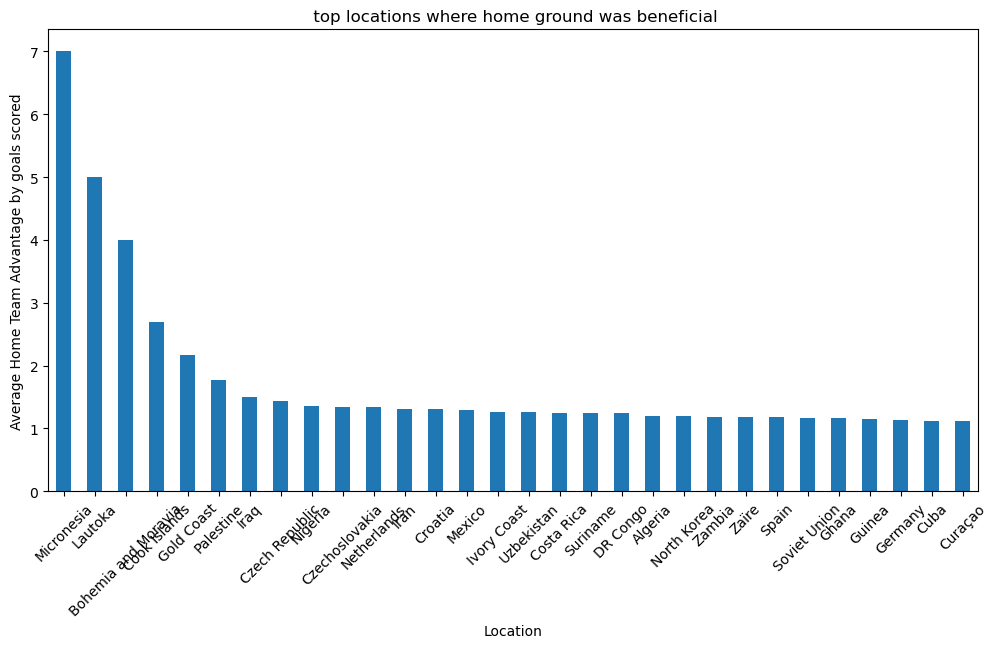

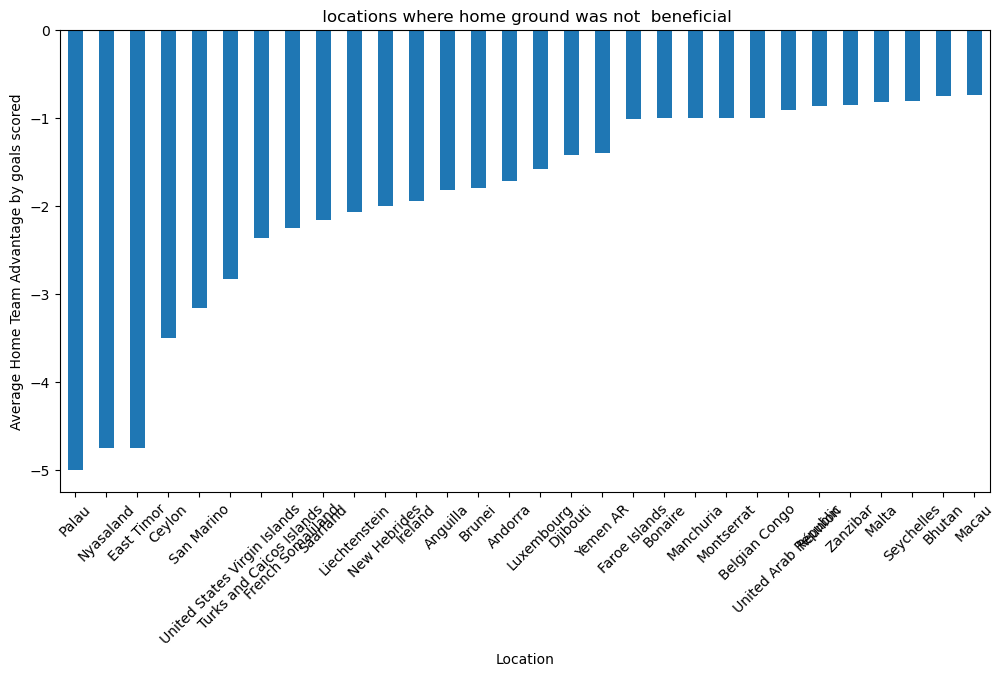

In [17]:

# Create a new column for home team advantage
data['home_team_advantage'] = data['home_score'] - data['away_score']

# Grouping the data by home team location and calculate the average home team advantage
average_advantage_by_location = data.groupby('country')['home_team_advantage'].mean()

# Sorting the average home team advantage in descending order for top locations
top_locations = average_advantage_by_location.sort_values(ascending=False).head(30)

# Sorting the average home team advantage in ascending order for bottom locations
bottom_locations = average_advantage_by_location.sort_values(ascending=True).head(30)

# Ploting the top locations where home ground was beneficial 
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.title(' top locations where home ground was beneficial')
plt.xlabel('Location')
plt.ylabel('Average Home Team Advantage by goals scored')
plt.xticks(rotation=45)
plt.show()




# Ploting the  locations where home ground was not significant  
plt.figure(figsize=(12, 6))
bottom_locations.plot(kind='bar')
plt.title(' locations where home ground was not  beneficial')
plt.xlabel('Location')
plt.ylabel('Average Home Team Advantage by goals scored')
plt.xticks(rotation=45)
plt.show()
